<center>
<a href="" ><img src="./logo.png" style="float:left; max-width: 200px; height: 145px; "/></a> 
</center>
<div id="report" style="text-align: center; padding: 10px; background-color:rgb(17, 16, 16); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); ">
  <h1 style="font-size: 2.2em; font-family: 'Georgia', serif; color:rgb(247, 239, 248); margin-bottom: 10px;">
    Détection de Fraude par une Méthode à Deux Niveaux 
  </h1>
  <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(227, 231, 235); margin: 5px 0;">
    Élaboré par :  
  </p>
  <div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 5px; justify-items: center; margin-bottom: 10px;">
  <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(225, 233, 241); font-weight: bold;">
      &#9733; ZIAN Hafsa
    </p>
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(225, 233, 241); font-weight: bold;">
      &#9733; HAYHAY Yasmine
    </p>
  </div>
  <div style="margin-top: 15px; padding: 5px; background-color: #ecf0f1; border-left: 4px solid rgb(127, 50, 129); border-radius: 8px; display: inline-block; max-width: 60%;">
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(16, 17, 17); margin: 0; font-style: italic;">
      Supervisé par : 
      <span style="font-weight: bold; color:rgb(129, 27, 116);">Pr. ELHARCHILI Fidae</span>
    </p>
  </div>
</div> 

## Setup du projet

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, homogeneity_score, completeness_score, v_measure_score
from tabulate import tabulate

KeyboardInterrupt: 

## Préparation des données

In [ ]:
# Chargement des données
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Normalisation de la variable 'Amount'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [ ]:
# Séparation des données
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Niveau supérieur : Régression logistique
La régression logistique est un modèle statistique utilisé pour la  classification par apprentissage supervisé qui est utilisé pour prédire les observations sur un ensemble discret de classes. 
En pratique, il est utilisé pour classer les observations en différentes catégories. Par conséquent, sa sortie est de nature discrète. La régression logistique est également appelée régression Logit.
### 1. Fonction Logistique (Sigmoïde)
La régression logistique utilise la fonction sigmoïde pour transformer une combinaison linéaire des variables d'entrée en une probabilité :
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
où :
- $ z = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n $ est une combinaison linéaire des variables d'entrée,
- $ w_i $ sont les poids du modèle.

La sortie de la fonction sigmoïde est comprise entre 0 et 1, ce qui permet d'interpréter le résultat comme une probabilité d'appartenance à une classe.

### 2. Fonction de Vraisemblance
On modélise la probabilité que $ y = 1 $ en fonction de $ x $ comme suit :

$$
P(y=1 | x) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

et donc :

$$
P(y=0 | x) = 1 - \sigma(z)
$$

Si on note $ p = P(y=1 | x) $, la probabilité conditionnelle de $ y $ est donnée par :

$$
P(y | x) = p^y (1 - p)^{1 - y}
$$

Le log de la vraisemblance pour un ensemble de $ m $ observations est :

$$
L(w) = \prod_{i=1}^{m} P(y_i | x_i)
$$

En prenant le logarithme (log-vraisemblance) :

$$
\ell(w) = \sum_{i=1}^{m} \left[ y_i \log p_i + (1 - y_i) \log (1 - p_i) \right]
$$

où $ p_i = \sigma(w^T x_i) $.


### 3. Estimation des Paramètres (Optimisation)
Les poids $ w $ sont estimés en maximisant la log-vraisemblance :

$$
\max_{w} \sum_{i=1}^{m} \left[ y_i \log \sigma(w^T x_i) + (1 - y_i) \log (1 - \sigma(w^T x_i)) \right]
$$

Cela se fait généralement par descente de gradient, où les mises à jour des poids suivent :

$$
w \leftarrow w - \alpha \nabla \ell(w)
$$

avec $ \alpha $ le taux d'apprentissage.

Le gradient est donné par :

$$
\frac{\partial \ell}{\partial w_j} = \sum_{i=1}^{m} (y_i - \sigma(w^T x_i)) x_{ij}
$$


### 4. Interprétation et Décision
L'algorithme retourne une probabilité $ p $. Pour prendre une décision binaire :

- Si $ p \geq 0.5 $, on prédit $ y = 1 $.
- Sinon, $ y = 0 $.



In [ ]:
#Crée un modèle de régression logistique avec une optimisation est basé sur la maximisation de la vraisemblance
log_reg = LogisticRegression(solver='liblinear',max_iter=1000, random_state=42)

#Apprend les paramètres w du modèle en maximisant la log-vraisemblance en utilisant la descente de gradient pour trouver les meilleurs poids w
log_reg.fit(X_train, y_train)

#- Calcule z et le passe  dans la fonction sigmoïde afin d'appliquer un seuil de décision pour le classer
y_pred_log_reg = log_reg.predict(X_test)

## Rapport de classification du niveau supérieur
### 1. Précision 
La précision est la proportion de prédictions positives correctes par rapport à toutes les prédictions positives faites par le modèle. 

$$
\text{Précision} = \frac{TP}{TP + FP}
$$

Où :
- TP : Vrais positifs, nombre d'exemples classés correctement comme appartenant à la classe positive,
- FP : Faux positifs, nombre d'exemples classés incorrectement comme appartenant à la classe positive.
### 2. Rappel (Recall)
Le rappel mesure la capacité du modèle à identifier correctement les éléments de la classe positive.

$$
\text{Rappel} = \frac{TP}{TP + FN}
$$

Où :
- FN  : Faux négatifs, nombre d'exemples appartenant à la classe positive, mais classés comme négatifs.
### 3. F1-score
Le F1-score est la moyenne harmonique entre la précision et le rappel. Il est souvent utilisé comme une mesure unique quand les classes sont déséquilibrées.

$$
\text{F1-score} = 2 \times \frac{\text{Précision} \times \text{Rappel}}{\text{Précision} + \text{Rappel}}
$$
### 4. Support
Le support représente le nombre total d’occurrences dans chaque classe réelle. Cela aide à comprendre si une classe est sur-représentée ou sous-représentée dans les données.
### 5. Précision macro, micro et pondérée
- Précision micro : Calculée globalement, en prenant en compte tous les vrais positifs, faux positifs et faux négatifs de toutes les classes.
  
$$
\text{Précision micro} = \frac{\sum TP}{\sum TP + \sum FP}
$$

- Précision macro : La moyenne des précisions calculées pour chaque classe, sans tenir compte du déséquilibre de classe.
  
$$
\text{Précision macro} = \frac{1}{n_{\text{classes}}} \sum_{i} \frac{TP_i}{TP_i + FP_i}
$$

- Précision pondérée : Calculée en tenant compte du support de chaque classe, c’est-à-dire du nombre d'exemples dans chaque classe.

$$
\text{Précision pondérée} = \frac{1}{m} \sum_{i} \text{support}_i \times \text{précision}_i
$$

In [ ]:
report_dict = classification_report(y_test, y_pred_log_reg, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(3)

print("\n Rapport de classification du niveau supérieur :\n")
print(tabulate(report_df, headers='keys', tablefmt='fancy_grid'))


Rapport de classification du niveau supérieur :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53698
           1       0.84      0.63      0.72        43

    accuracy                           1.00     53741
   macro avg       0.92      0.81      0.86     53741
weighted avg       1.00      1.00      1.00     53741

Matrice de confusion du niveau supérieur :
[[53693     5]
 [   16    27]]


### 6. Matrice de confusion
La matrice de confusion donne une vue détaillée des performances du modèle en montrant combien d'exemples ont été correctement ou incorrectement classés dans chaque classe

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
labels = ["Classe 0", "Classe 1"]
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
print("\nMatrice de confusion du niveau supérieur :\n")
print(tabulate(conf_matrix_df, headers="keys", tablefmt="fancy_grid"))


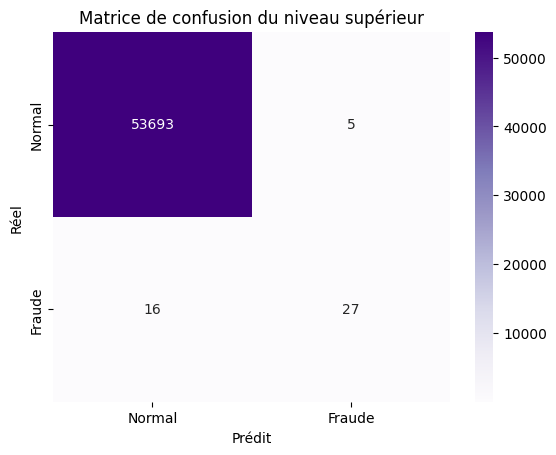

In [ ]:
# Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion du niveau supérieur')
plt.show()

### 7. La courbe ROC
La courbe ROC est une représentation graphique qui montre les performances d'un modèle de classification à différents seuils de décision. Elle est tracée en fonction de deux mesures :

- TPR (True Positive Rate), aussi appelé Rappel : la proportion des instances positives qui ont été correctement identifiées par le modèle.
  
  $$
  \text{TPR} = \frac{TP}{TP + FN}
  $$

- FPR (False Positive Rate), aussi appelé Taux de faux positifs : la proportion des instances négatives qui ont été incorrectement classées comme positives.
  
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$
Le but est de maximiser le TPR (rappel) tout en minimisant le FPR (faux positifs

In [ ]:
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC :", auc_roc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

## Niveau inférieur : K-means
Le K-means est un algorithme de clustering non supervisé qui cherche à partitionner un ensemble de données en $ k $ clusters ou groupes distincts, où chaque donnée appartient à un seul cluster. Voici un exposé des fondements mathématiques du K-means :

### Objectif du K-means
L'objectif de l'algorithme est de minimiser la somme des distances au carré entre les points de données et leurs centres de clusters respectifs. Le but est de trouver un ensemble de $ k $ centres de clusters qui minimisent cette somme de distances.

### 1. Fonction de coût (Optimisation)
La fonction de coût que K-means cherche à minimiser est définie comme suit :

$$
J(c, \mu) = \sum_{i=1}^{n} \sum_{k=1}^{K} \mathbb{1}(c_i = k) \| x_i - \mu_k \|^2
$$

Où :
- $ n $ est le nombre total de points de données.
- $ K $ est le nombre de clusters.
- $ c_i $ est le cluster assigné au point $ x_i $.
- $ \mathbb{1}(c_i = k) $ est une fonction indicatrice qui vaut 1 si $ x_i $ appartient au cluster $ k $, et 0 sinon.
- $ \mu_k $ est le centroïde du cluster $ k $.
- $ \| x_i - \mu_k \|^2 $ est la distance au carré entre le point $ x_i $ et le centroïde $ \mu_k $.

### 2. Étapes de l'algorithme K-means

L'algorithme K-means procède par une série d'itérations qui alternent entre deux étapes :

#### Étape 1 : Assignation des points au cluster le plus proche
Chaque point $ x_i $ est affecté au cluster $ k $ dont le centroïde $ \mu_k $ est le plus proche. Ceci peut être formulé par la règle de minimisation suivante :
$$
c_i = \arg\min_k \| x_i - \mu_k \|^2
$$
Cela signifie que chaque point $ x_i $ est assigné au cluster dont le centroïde minimise la distance au point $ x_i $.

#### Étape 2 : Mise à jour des centroïdes
Une fois que tous les points ont été assignés à des clusters, les centroïdes $ \mu_k $ sont mis à jour en calculant la moyenne des points qui leur sont assignés :
$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$
Où $ C_k $ est l'ensemble des points dans le cluster $ k $, et $ |C_k| $ est le nombre de points dans ce cluster.

### 3. Convergence de l'algorithme
L'algorithme K-means converge lorsque les centroïdes ne changent plus, c'est-à-dire qu'il n'y a plus de modification dans l'assignation des points aux clusters. L'algorithme garantit que la fonction de coût diminue à chaque itération, mais il peut parfois se retrouver dans des minima locaux

### 4. Métriques de performance
Une mesure souvent utilisée pour évaluer la qualité du clustering est la somme des carrés intra-cluster :

$$
SSW = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

L'idée est que plus la distance entre les points d'un cluster et son centroïde est faible, plus la qualité du clustering est élevée.

In [ ]:
#Utilise la sortie du modèle de régression logistique pour identifier les transactions qui ont été classées comme suspectes, c'est-à-dire celles où y_pred_log_reg == 1.
suspect_indices = np.where(y_pred_log_reg == 1)[0] 
X_suspect = X_test.iloc[suspect_indices]  

In [ ]:
#l'algorithme K-means est appliqué sur les transactions suspectes (X_suspect)
#Le modèle essaie de diviser les transactions en 2 clusters fraudes potentielles et non-fraudes).
kmeans = KMeans(n_clusters=2, random_state=42)
#Le fit_predict permet à l'algorithme de trouver les deux clusters et d'assigner chaque transaction suspecte à l'un des clusters
#Le tableau clusters contient les labels de chaque transaction (0 ou 1 selon le cluster auquel elle appartient)
clusters = kmeans.fit_predict(X_suspect)

In [ ]:
#Compare le nombre de vraies fraudes (y_test == 1) dans chaque cluster pour identifier le cluster contenant le plus grand nombre de fraudes
#Si le cluster 1 contient plus de fraudes que le cluster 0, alors fraud_cluster = 1. Sinon, c'est le cluster 0 qui est considéré comme celui des fraudes
fraud_indices = suspect_indices[clusters == fraud_cluster]

In [ ]:
# Résultats du niveau inférieur
print("\nNombre de transactions suspectes détectées au niveau inférieur :", len(fraud_indices))


Nombre de transactions suspectes détectées au niveau inférieur : 30


In [ ]:
homogeneity = homogeneity_score(y_test.iloc[suspect_indices], clusters)
completeness = completeness_score(y_test.iloc[suspect_indices], clusters)
v_measure = v_measure_score(y_test.iloc[suspect_indices], clusters)

print(f"Homogeneity Score: {homogeneity:.3f}")
print(f"Completeness Score: {completeness:.3f}")
print(f"V-Measure Score: {v_measure:.3f}")


conf_matrix = confusion_matrix(y_test.iloc[suspect_indices], clusters)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Cluster 0', 'Cluster 1'], index=['Classe 0', 'Classe 1'])
print("\nMatrice de confusion :\n")
print(tabulate(conf_matrix_df, headers="keys", tablefmt="fancy_grid"))

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Classe 0', 'Classe 1'], cbar=False)
plt.xlabel('Prédictions des clusters')
plt.ylabel('Véritables classes')
plt.title('Matrice de confusion')
plt.show()


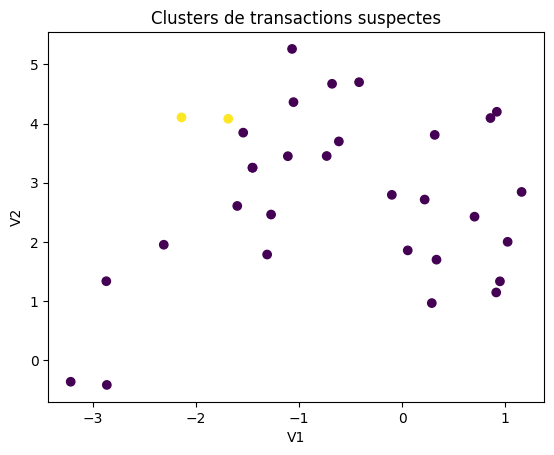

In [ ]:
# Visualisation des clusters
plt.scatter(X_suspect.iloc[:, 0], X_suspect.iloc[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clusters de transactions suspectes')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [ ]:
# Analyse des clusters
X_suspect = X_test.iloc[suspect_indices].copy()
X_suspect.loc[:, 'Cluster'] = clusters
cluster_summary = X_suspect.groupby('Cluster').mean()
print("\nRésumé des clusters :\n")
print(tabulate(cluster_summary, headers='keys', tablefmt='fancy_grid'))


Résumé des clusters :
               V1        V2        V3        V4        V5        V6        V7  \
Cluster                                                                         
0       -0.597411  2.706761 -4.583068  4.203522  0.176659 -1.852736 -1.952580   
1       -1.913733  4.093060 -8.383699  4.796815 -4.416481 -3.639242 -8.604351   

               V8        V9        V10  ...       V20       V21       V22  \
Cluster                                 ...                                 
0        0.722349 -2.107344  -4.057891  ...  0.358572  0.488613  0.038423   
1        1.835146 -3.648346 -12.450019  ...  1.512608  1.623704 -0.354571   

              V23       V24       V25       V26       V27       V28    Amount  
Cluster                                                                        
0       -0.120544 -0.352995 -0.069781  0.160953  0.408836  0.164253 -0.248266  
1       -0.328897  0.140393  1.271590 -0.362322  2.132150  1.040671 -0.349711  

[2 rows x 29 columns]


C:\Users\l\AppData\Local\Temp\ipykernel_23072\956592193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_suspect['Cluster'] = clusters
